In [69]:
# importing packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
plt.style.use

<function matplotlib.style.core.use(style)>

In [20]:
# read data
app = pd.read_csv("AppleStore.csv")
# delete first two and last columns
app = app.iloc[:,2:16]
# delete app size, currency, version
rm_columns = ['size_bytes','currency','ver']
app = app.drop(rm_columns,1)
app.head()

# add free/not free column
app['is_not_free'] = app['price'].apply(lambda x:1 if x!=0 else 0)
app.head()

,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,is_not_free
0,PAC-MAN Premium,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
1,Evernote - stay organized,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,0
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,0
4,Bible,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,0


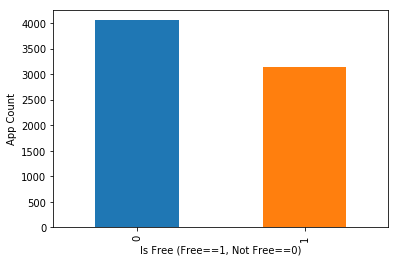

There are 4056 free apps
There are 3141 priced apps


In [140]:
# bar chart showing free/not free 
app['is_not_free'].value_counts().plot.bar()
plt.xlabel('Is Free (Free==1, Not Free==0)')
plt.ylabel('App Count')
plt.show()
# getting count of such apps
df_free = app[app['is_not_free']==0] # extract the ROWS of apps that are free
df_not_free = app[app['is_not_free']==1] # extract the ROWS of apps that are priced
print('There are ' + str(df_free['is_not_free'].count()) + ' free apps')
print('There are ' + str(df_not_free['is_not_free'].count()) + ' priced apps')

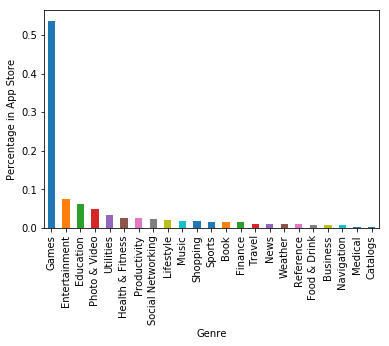

We see that more than half of the apps are games.


In [162]:
genre_count = app['prime_genre'].value_counts()
#genre_count.plot(kind='bar')
total_count = app['prime_genre'].value_counts().sum()
percentage = app['prime_genre'].value_counts()/total_count
percentage.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Percentage in App Store')
plt.show()

print('We see that more than half of the apps are games.')

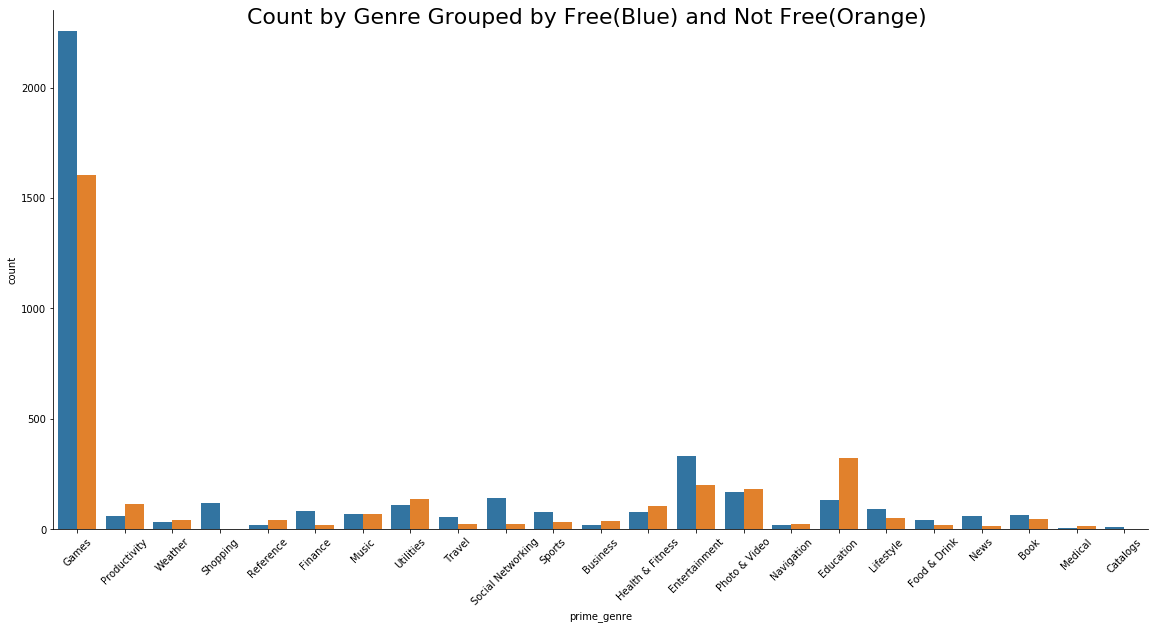

Some observations include:
 - More functional apps (ex: productivity, utilities, fitness, education etc) are priced
 - Top 3 genres with the most free apps: games, entertainment, photo & video
 - Top 3 genres with the most non-free apps: games, education, entertainment
 - The majority of practical apps (utilities, edu, productivity etc) are priced
 - One thing to note is that some free apps have pay-only features, therefore not all free apps are entirely free


In [211]:
# plotting the amount of apps by genre, separated by the price (free/not free)
barplot = sns.catplot(x='prime_genre',kind='count', hue='is_not_free', data=app, height=8, aspect=2, legend=False)
fig = barplot.fig
fig.suptitle('Count by Genre Grouped by Free(Blue) and Not Free(Orange)', size=22)
plt.ylim(0,2350)
plt.xticks(rotation=45)
plt.show()

print('Some observations include:')
print(' - More functional apps (ex: productivity, utilities, fitness, education etc) are priced')
print(' - Top 3 genres with the most free apps: games, entertainment, photo & video')
print(' - Top 3 genres with the most non-free apps: games, education, entertainment')
print(' - The majority of practical apps (utilities, edu, productivity etc) are priced')
print(' - One thing to note is that some free apps have pay-only features, therefore not all free apps are entirely free')


